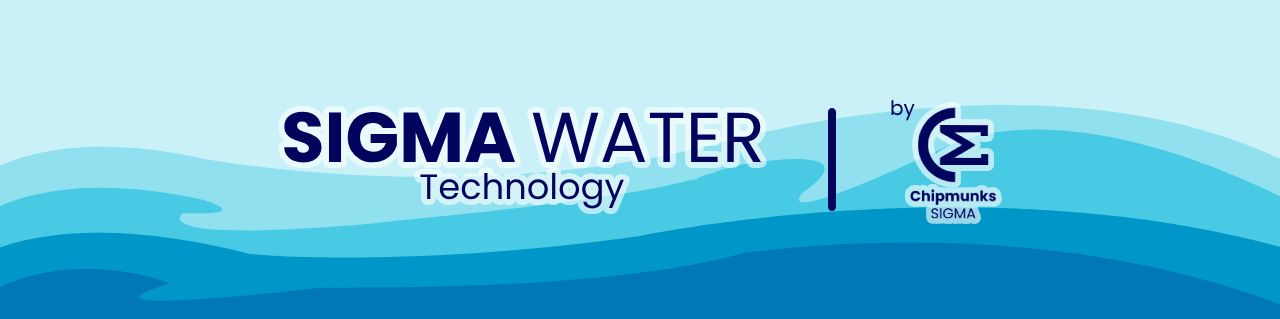

# Pendahuluan
---
Sigma Water Technology merupakan implementasi dari penambangan data yang berfokus pada data yang memuat sifat fisika dan kimia pada air. Data air ini akan dimodelkan untuk mengetahui pembagian kegunaan air berdasarkan sifatnya. Implementasi penambangan data ini bertujuan untuk memberikan kontribusi terhadap *17 Sustainable Development Goals (SDG)*, yaitu, *Clean Water and Sanitation* dan *Industry, Innovation and Infrastructure*.

Metode yang digunakan untuk melakukan pengelompokan adalah metode CRSIP-DM.  

Dataset yang digunakan bersumber dari:
https://www.kaggle.com/datasets/adityakadiwal/water-potability

### Daftar Isi :
1. Deskripsi fitur
2. *Library*
3. Impor *dataset*
4. Eksplorasi data
5. Pra pemrosesan data
6. Pemodelan
7. Evaluasi
8. Kesimpulan

### 1. Deskripsi Fitur
----

1. `ph` : Indikator kondisi air yang bersifat asam atau basa. Rentang pH berkisar antara 0-14.

2. `Hardness` (kesadahan) : Kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium dalam satuan *mg/L*.

3. `Solids` (*Total dissolved solids - TDS*) : Kandungan berbagai macam mineral atau garam anorganik dan beberapa mineral atau garam organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. dalam satuan *ppm*.

4. `Chloramines` : Jumlah Kloramin dalam satuan *ppm*.

5. `Sulfate` : Jumlah Sulfat terlarut dalam satuan *mg/L*.

6. `Conductivity` : Konduktivitas listrik *(EC)* mengukur proses ionik suatu larutan yang memungkinkannya mentransmisikan arus dalam satuan *μS/cm*.

7. `Organic_carbon` : Ukuran jumlah total karbon dalam senyawa organik dalam air murni dalam satuan *ppm*.

8. `Trihalomethanes` : Zat kimia yang dapat ditemukan dalam air yang diolah dengan klorin dalam satuan *μg/L*.

9. `Turbidity` (Kekeruhan) : Merupakan ukuran sifat air yang memancarkan cahaya bergantung pada kuantitas zat padat yang ada dalam keadaan tersuspensi dalam satuan *NTU*.

10. `Potability` : Menunjukkan apakah air aman untuk dikonsumsi manusia. Dapat diminum - 1 dan Tidak dapat diminum - 0.

### 2. Library
----

In [ ]:
# library untuk manipulasi data
import pandas as pd

# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk pra-pemrosesan data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# library untuk pemodelan
from sklearn.cluster import KMeans

# library untuk evaluasi
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### 3. Impor dataset
----

In [ ]:
# pengimporan dataset
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# memeriksa informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### 4. Eksplorasi data
----

In [ ]:
# melihat deskripsi statistik df
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# mendefinisikan fitur dan warna
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',]
colors = ['#d9ed92', '#B5E48C', '#99D98C', '#76C893', '#52B69A', '#34A0A4', '#168AAD', '#1A759F', '#1E6091',]

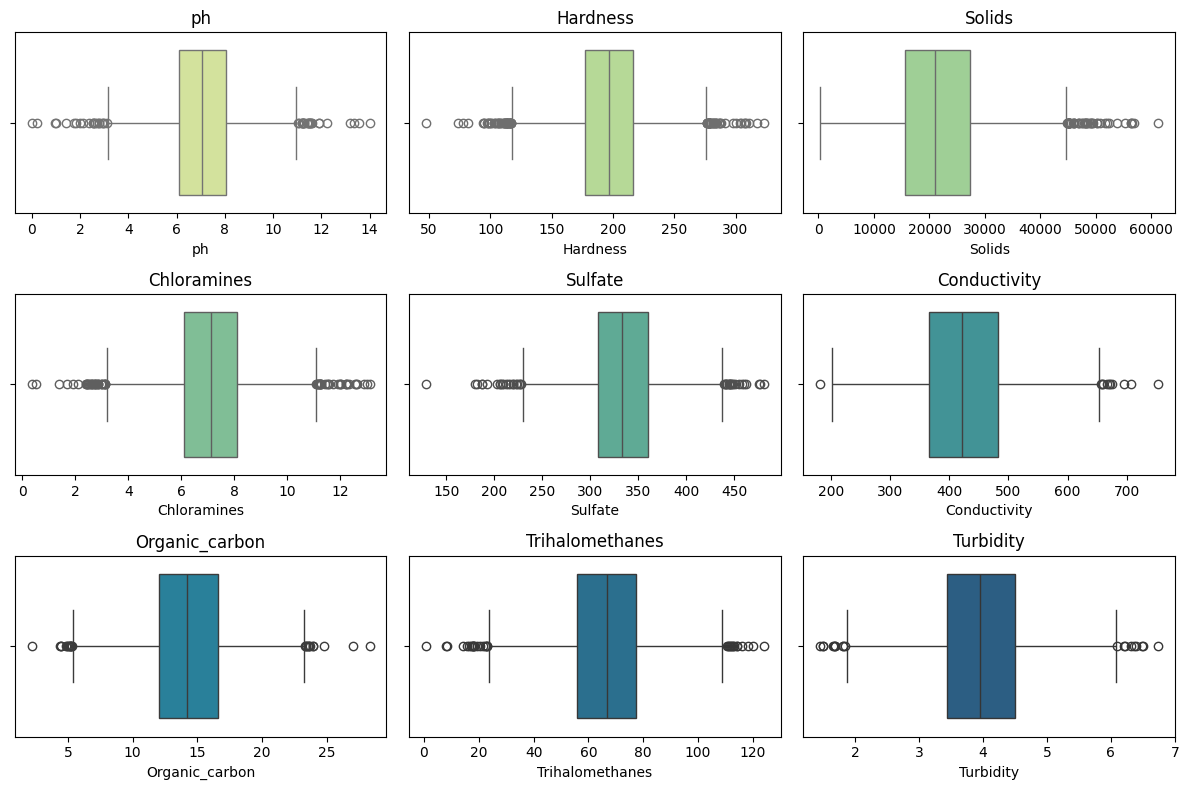

In [ ]:
# memeriksa distribusi dengan visualisasi boxplot
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature], color=colors[i-1])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

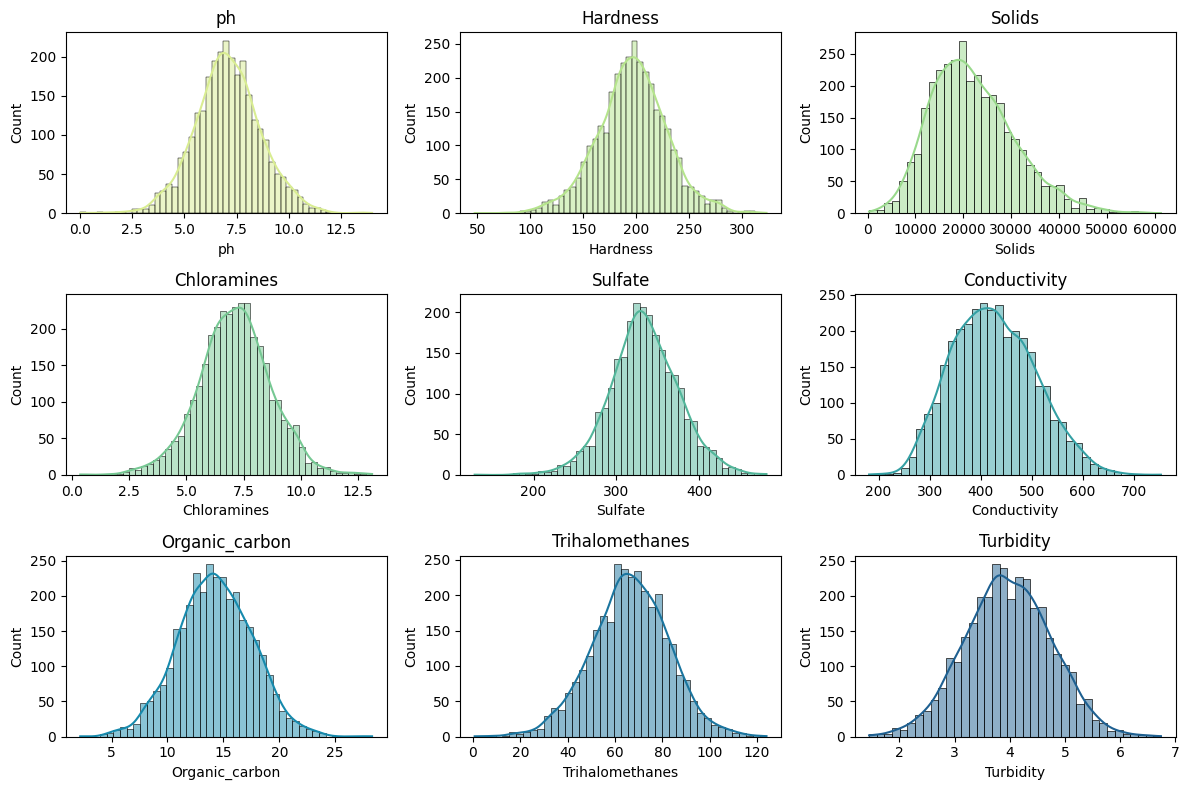

In [ ]:
# memeriksa distribusi dengan visualisasi histogram
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, color=colors[i-1])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

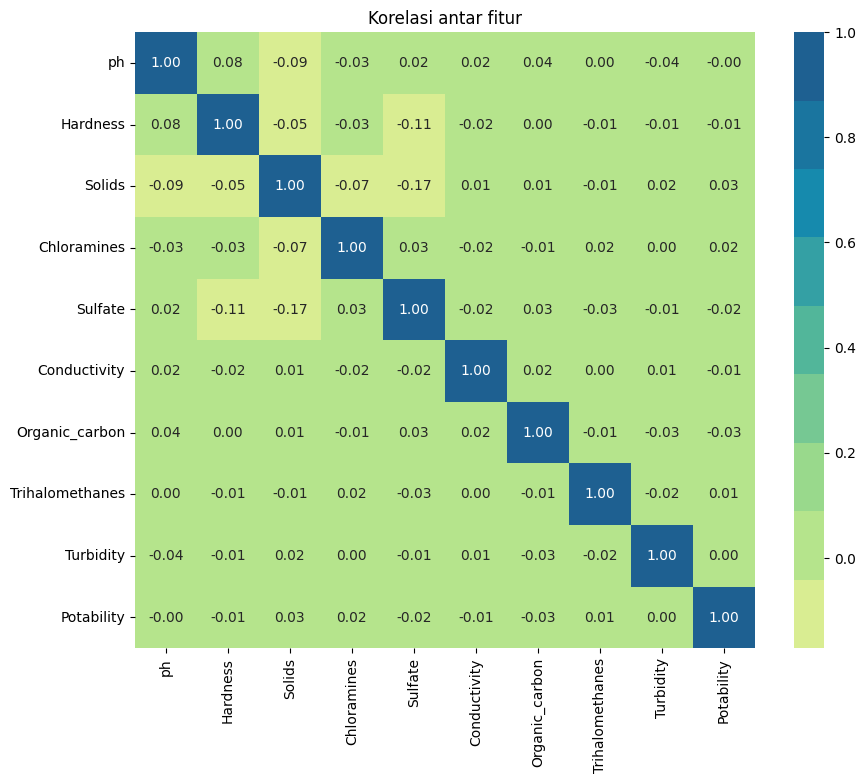

In [ ]:
# memeriksa korelasi dengan visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=colors)
plt.title('Korelasi antar fitur')
plt.show()

### 5. Pra pemrosesan data
----

In [ ]:
# memeriksa missing value
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
# menghilangkan data null
df = df.dropna()

In [ ]:
# memeriksa missing value kembali
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
# cek info kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Fitur yang akan digunakan dalam pemodelan, didasarkan pada
`PERATURAN PEMERINTAH REPUBLIK INDONESIA
NOMOR 22 TAHUN 2021
TENTANG PENYELENGGARAAN PERLINDUNGAN DAN PENGELOLAAN LINGKUNGAN HIDUP` yang berisi pengelompokan air berdasarkan beberapa parameter.

Dokumen peraturan : https://jdih.setkab.go.id/PUUdoc/176367/Lampiran_VI_Salinan_PP_Nomor_22_Tahun_2021.pdf


In [ ]:
# mendrop kolom yang tidak digunakan dari df
df_clean = df.drop(columns=['Hardness', 'Chloramines', 'Conductivity', 'Trihalomethanes', 'Turbidity', 'Organic_carbon'])

In [ ]:
# Pemilihian batasan fitur yang akan digunakan
df_clean

,ph,Solids,Sulfate,Potability
3,8.316766,22018.417441,356.886136,0
4,9.092223,17978.986339,310.135738,0
5,5.584087,28748.687739,326.678363,0
6,10.223862,28749.716544,393.663396,0
7,8.635849,13672.091764,303.309771,0
...,...,...,...,...
3267,8.989900,15921.412018,312.931022,1
3268,6.702547,17246.920347,304.510230,1
3269,11.491011,37188.826022,258.930600,1
3270,6.069616,26138.780191,345.700257,1


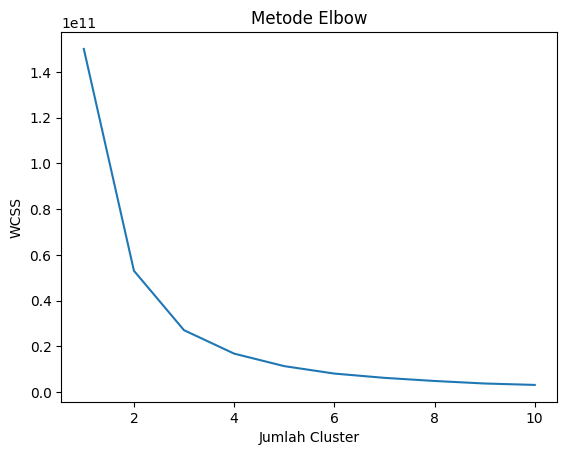

In [ ]:
# membuat grafik elbow untuk pertimbangan jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Dari grafik elbow, terlihat bahwa titik optimum untuk membuat *cluster* adalah pada jumlah *cluster* = 3.

In [ ]:
# Skalasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

In [ ]:
# PCA untuk menurunkan dimensi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

### 6. Pemodelan

Pemodelan menggunakan *K-Means*

In [ ]:
# menetapkan jumlah klaster sebanyak 3
kmeans = KMeans(n_clusters=3, random_state=42)

# melakukan fitting pada data
y_kmeans = kmeans.fit_predict(pca_components)

# menyisipkan hasil klaster ke dataframe
df_clean['Cluster_Kmeans'] = y_kmeans
df['Cluster_Kmeans'] = y_kmeans

<ipython-input-195-d58c643a6dcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_Kmeans'] = y_kmeans


### 7. Evaluasi
----

Evaluasi untuk K-Means

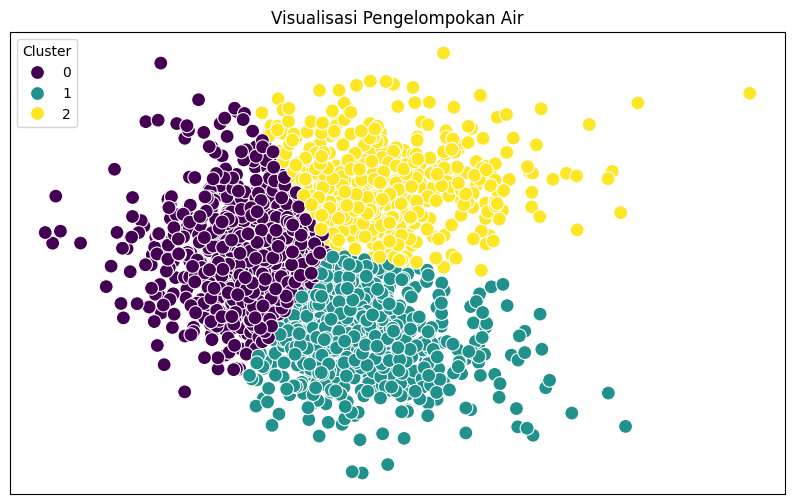

In [ ]:
# Visualisasi hasil klaster K-Means
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = y_kmeans
plt.figure(figsize=(10, 6))
plt.title('Visualisasi Pengelompokan Air')
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.show()

In [ ]:
# mendapatkan skor silhouette dari model
silhouette_avg = silhouette_score(pca_components, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3881839620925603


In [ ]:
# Analisis deskriptif tiap cluster
for i in range(3):
    print(f"\nCluster {i}")
    print(df_clean[df_clean['Cluster_Kmeans'] == i].describe())


Cluster 0
               ph        Solids     Sulfate  Potability  Cluster_Kmeans
count  779.000000    779.000000  779.000000  779.000000           779.0
mean     7.822440  16358.952292  359.383915    0.351733             0.0
std      1.425690   5995.511827   34.396667    0.477818             0.0
min      4.296247    320.942611  258.312879    0.000000             0.0
25%      6.866679  12313.208853  335.624611    0.000000             0.0
50%      7.793834  15797.030396  357.384709    0.000000             0.0
75%      8.764250  19795.540205  380.171832    1.000000             0.0
max     14.000000  41982.610655  481.030642    1.000000             0.0

Cluster 1
               ph        Solids     Sulfate  Potability  Cluster_Kmeans
count  720.000000    720.000000  720.000000  720.000000           720.0
mean     5.986404  24996.889501  324.465328    0.059722             1.0
std      1.278632   8124.843717   34.604118    0.237136             0.0
min      0.227499   6967.735565  203.44452

Cluster_Kmeans  Potability
0               0             505
                1             274
1               0             677
                1              43
2               1             494
                0              18
Name: count, dtype: int64


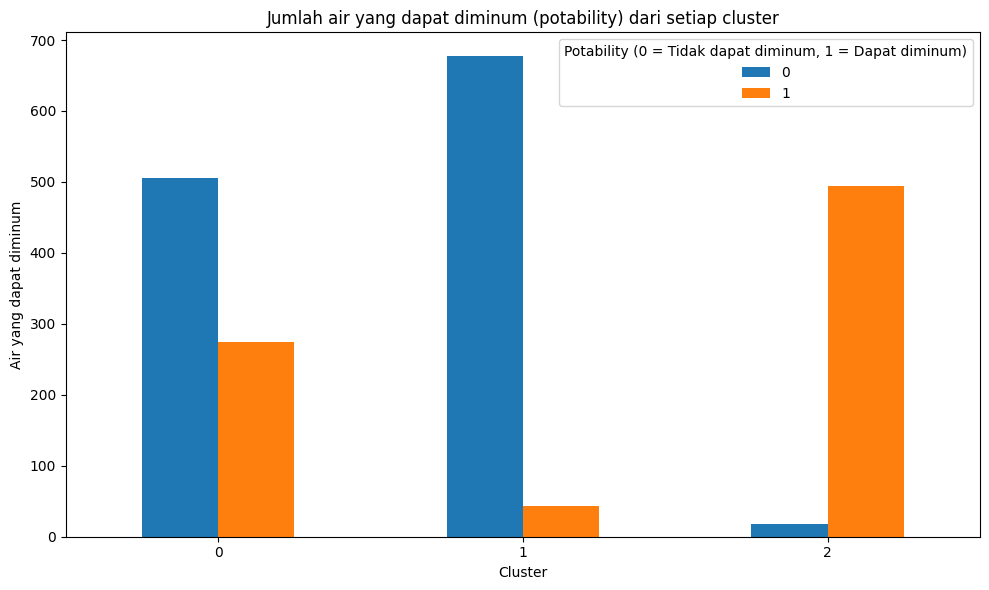

In [ ]:
# melihat jumlah air yang dapat diminum (potability) dari setiap cluster
cluster_counts = df.groupby('Cluster_Kmeans')['Potability'].value_counts()
print(cluster_counts)
cluster_counts.unstack().fillna(0).plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah air yang dapat diminum (potability) dari setiap cluster')
plt.xlabel('Cluster')
plt.ylabel('Air yang dapat diminum')
plt.legend(title='Potability (0 = Tidak dapat diminum, 1 = Dapat diminum)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()